# SUBQUERIES in SQL - Campusx

https://youtu.be/YYq47MN3TZI

A subquery is a query within another query. It is a SELECT statement that is
nested inside another SELECT, INSERT, UPDATE, or DELETE statement. The
subquery is executed first, and its result is then used as a parameter or condition
for the outer query.

#### Subqueries can be used inside:

1. SELECT


2. FROM


3. WHERE


4. HAVING


5. INSERT


6. UPDATE


7. DELETE

### Types of Subquries:

`In SQL, subqueries are queries nested within another query to perform specific tasks. There are several types of subqueries, each serving different purposes:

1. **Scalar Subquery:**
   - Returns a single value (one row and one column) to the outer query.
   - Often used in expressions, comparisons, or calculations.
   - Example: `SELECT name, (SELECT MAX(salary) FROM employees) AS max_salary FROM employees;`


2. **Single-Row Subquery:**
   - Returns a single row with multiple columns to the outer query.
   - Typically used with comparison operators such as `IN`, `=`, `<`, `>`, etc.
   - Example: `SELECT name FROM employees WHERE salary = (SELECT MAX(salary) FROM employees);`


3. **Multi-Row Subquery:**
   - Returns multiple rows with one or more columns to the outer query.
   - Typically used with the `IN` or `ANY` operators.
   - Example: `SELECT name FROM employees WHERE department_id IN (SELECT department_id FROM departments WHERE location = 'New York');`


4. **Correlated Subquery:**
   - References columns from the outer query in the inner query.
   - Executed once for each row processed in the outer query.
   - Example: `SELECT name FROM employees e WHERE salary > (SELECT AVG(salary) FROM employees WHERE department_id = e.department_id);`


5. **Nested Subquery:**
   - A subquery within another subquery.
   - Provides a way to perform more complex queries by building on multiple levels of nesting.
   - Example: `SELECT name FROM employees WHERE department_id = (SELECT department_id FROM departments WHERE name = 'Sales');`


6. **Correlated EXISTS Subquery:**
   - Checks for the existence of rows in the subquery result.
   - Used with the `EXISTS` keyword in conditions.
   - Example: `SELECT name FROM customers c WHERE EXISTS (SELECT 1 FROM orders o WHERE o.customer_id = c.customer_id AND o.order_date > '2023-01-01');`

These subquery types offer various ways to manipulate and retrieve data based on specific conditions or relationships within a database.

### Combination of 2 conditions :

#### Find the most profitable movie of each year

```sql
SELECT * FROM movies
WHERE (year,gross - budget) IN
(select year, max(gross - budget) as profit from movies
GROUP BY year);
```

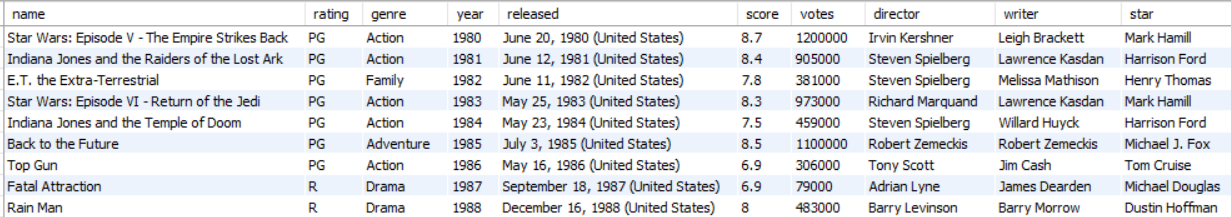

### 2nd example query on 2 conditions:

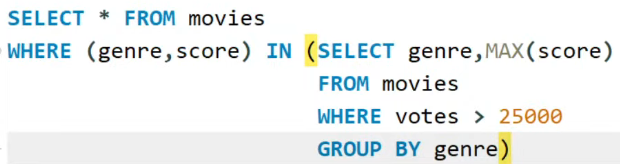

### Co-related subquery - Not preffered over JOINS and Groupby

https://youtu.be/YYq47MN3TZI?t=4944

A correlated subquery is a type of SQL subquery that refers to a column from the outer query within its own query block. This creates a relationship, or correlation, between the inner and outer queries. The inner query's result depends on the specific row being processed in the outer query. Correlated subqueries are used to compare values between the main query and the subquery for filtering or matching purposes. They are typically slower and less efficient compared to non-correlated subqueries.

In short, a correlated subquery connects an inner query to an outer query using data from the outer query's current row.

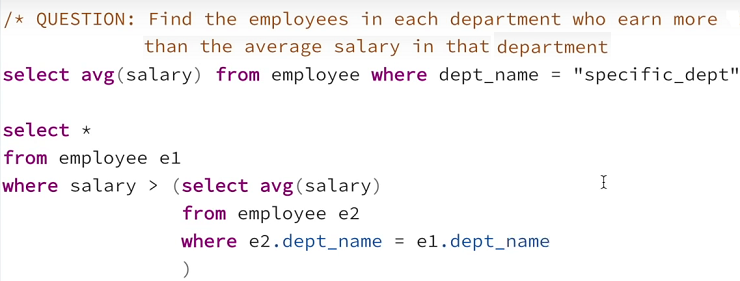

#### Find all the movies that have a rating higher than the average rating of movies in the same genre:

```sql
Select * from movies m1
WHERE score > (Select AVG(score) from movies m2 
                where m1.genre = m2.genre)
```

### SUB query in SELECT statement

#### Get the percentage of votes for each movie compared to the total number of votes.


```sql
SELECT
name, 
SUM(votes),
ROUND (SUM(votes)/(SELECT SUM(votes) from movies),4)*100 as percent
from movies
GROUP BY name;
```

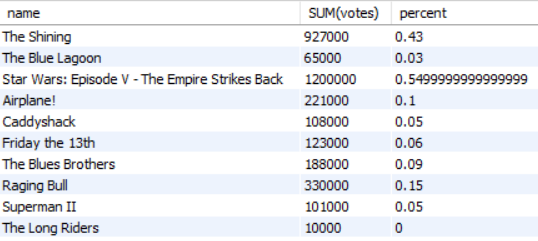

### Not efficient sub-query : SELECT inside SELECT

#### Display all movie names ,genre, score and avg(score) of genre

```sql
SELECT name,genre,score,(SELECT
ROUND(AVG(score),3)
FROM movies m2
WHERE m1.genre = m2.genre) as avg_genre
FROM movies m1;
```

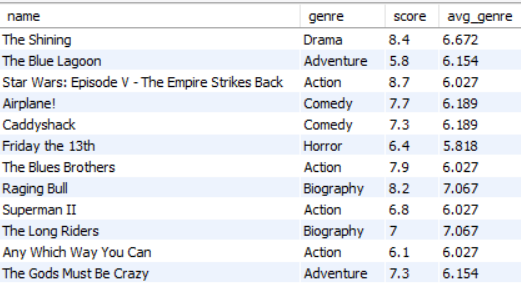

### <span class="mark">Difference between subqueries and co related sub-queries:</span>

##### In essence, the key difference is that a correlated subquery establishes a connection between the inner and outer queries by utilizing the current row's data in the outer query,
### eg : WHERE e1.department_id = e2.department_id


##### whereas a non-correlated subquery operates independently of the outer query's data.

Subqueries and correlated subqueries are both types of SQL queries, but they serve different purposes and have distinct characteristics:

1. **Subquery (Non-Correlated Subquery):**
    - A non-correlated subquery is a subquery that can run independently of the outer query.
    - It executes once and provides a single result set that the outer query uses.
    - It doesn't reference columns from the outer query, making it self-contained.
    - It's used to retrieve a single value or a set of values that are used as constants in the outer query.
   
```sql
SELECT employee_id, salary
FROM employees
WHERE salary > (SELECT AVG(salary) FROM employees);

```

2. **Correlated Subquery:**
   - A correlated subquery is a subquery that references columns from the outer query.
   - The subquery's execution depends on the data of the current row being processed in the outer query.
   - It is executed repeatedly, once for each row processed by the outer query.
   - Correlated subqueries can be less efficient and slower than non-correlated subqueries, especially for large datasets.
   - They are used when comparing data between the inner and outer queries is necessary.
   
```sql
SELECT employee_id, salary
FROM employees e1
WHERE salary > (
    SELECT AVG(salary)
    FROM employees e2
    WHERE e1.department_id = e2.department_id
);
```

# WINDOW FUNCTIONS

Window functions in SQL are a type of aggregate function that operate over a set of rows, defined by a sliding window or a set of rows. They are used to perform calculations on a subset of rows, rather than on the entire result set of a query.


The window specification is defined using the __OVER() clause in SQL__, which specifies
the partitioning and ordering of the rows that the window function will operate
on.


Window functions allow you to perform calculations that depend on the values of multiple rows in a query, and can be useful for tasks such as calculating running totals, moving averages, percentiles, and more.


### NOTE : It is mandatory to use OVER () while using WINDOWS Function.

### How WINDOW Function is different from GROUP BY of pandas

**WINDOW Functions:**
- Operate within the context of individual rows.


- Calculate values based on a window of related rows around each row.


- Values are added as new columns to the existing rows.


- Suitable for analytical calculations within rows.


- __Retains the same number of rows in the result.__

**GROUP BY in pandas:**


- Groups rows with the same values in specified columns.


- Aggregates data within each group using functions like sum, mean, etc.


- Reduces the number of rows, representing each group with a single row.


- Used for summarizing data based on column values.


- __Changes the number of rows in the result by collapsing groups.__

## OVER clause

The OVER clause in MySQL is used to define a window function that performs a calculation across a set of rows that are related to the current row. 

It is used with aggregate functions like SUM, AVG, MIN, MAX, etc. to perform calculations over a specified range of rows.

__NOTE : if nothing is passed insider OVER() then it aggregates over entire column__

```sql
SELECT name, marks, AVG(marks) OVER ()
FROM students;
```

```sql
SELECT name, salary, AVG(salary) OVER (ORDER BY salary) avg_salary
FROM employees;
```

#### USING JOIN

```sql
SELECT student_fname, student_lname, students.location, total_count, average_experience from students 
JOIN 
(select location, count(location) as total_count, avg(years_of_experience) as average_experience from students GROUP BY location) as temptable 
ON students.location = temptable.location;
```

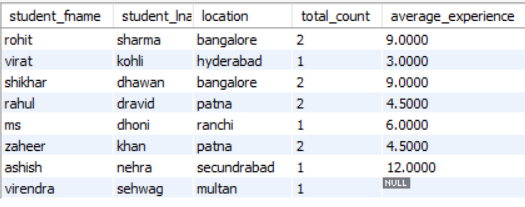

#### SAME using OVER AND PARTITION BY

```sql
SELECT student_fname, student_lname, location, COUNT(location) OVER (PARTITION BY location) as total_students,
avg(years_of_experience)  OVER (PARTITION BY location) AS avg_exp 
from students;
```

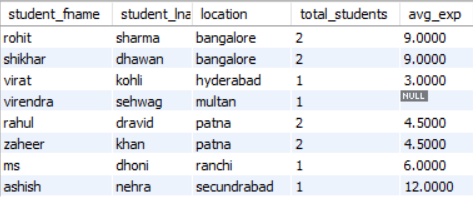

## PARTITION


PARTITION BY is a clause in the GROUP BY statement in MySQL. It divides the rows of a result set into partitions based on the values of the specified column or columns.

The purpose of using PARTITION BY is to provide an additional level of grouping within a GROUP BY statement. With it, you can perform aggregate operations (such as SUM, AVG, MIN, etc.) on each partition separately, rather than on the entire result set.

__The PARTITION BY clause is useful in situations where you want to perform the same aggregate operation on multiple partitions of data.__

### BENEFIT of PARTITION over GROUPBY :

WE can use non-aggregated columns also in partition by. Unlike in GROUPBY we can only use columns passed to GROUPBY.

##### partition on location and assign rank to years of experience based on location

```sql
SELECT student_fname, student_lname, location, years_of_experience, row_number() 
OVER (PARTITION by location ORDER BY years_of_experience DESC) AS ranking_exp
FROM students;
```

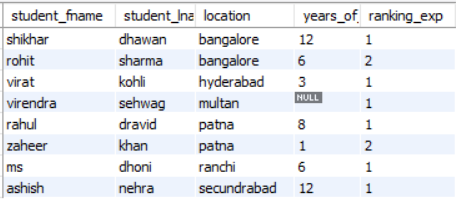

##### Highest years of experience from each location

```sql
SELECT * from 
(SELECT student_fname, student_lname, location, years_of_experience, row_number() 
OVER (PARTITION by location ORDER BY years_of_experience DESC) AS ranking_exp
FROM students) as temptable 
WHERE ranking_exp=1 ;
```

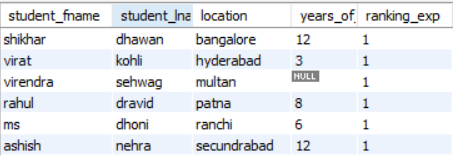

#### marks greater than respective branch's avg marks 

```sql
SELECT * FROM 
(SELECt *,
AVG(marks) OVER(Partition by (branch)) as branch_avg_marks
FROM task_campusx.marks) as t
WHERE marks > branch_avg_marks;
```

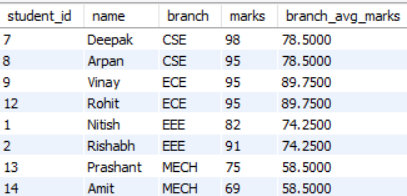

### PARTITION BY on Multiple columns

#### cheapest flights between 2 cities

```sql
SELECT * FROM 
    (SELECT source,destination,airline,AVG(price) AS 'avg_fare',
    DENSE_RANK() OVER(PARTITION BY source, destination ORDER BY AVG(price)) AS 'rank'
    FROM flights
    GROUP BY source,destination,airline) as
t
WHERE t.rank < 2
```

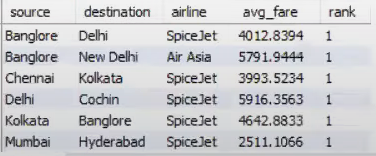

## Types of Window functions :

- __ROW_NUMBER:__ Assigns a unique number to each row in the result set, based on the order specified in the ORDER BY clause of the OVER clause.


- __RANK:__ Assigns a unique rank to each row in the result set, based on the order specified in the ORDER BY clause of the OVER clause. Rows with the __same values receive the same rank, and a gap is left in the ranking for the next unique value.__


- __DENSE_RANK:__ Assigns a unique rank to each row in the result set, based on the order specified in the ORDER BY clause of the OVER clause. __Rows with the same values receive the same rank, and there is no gap in the ranking for the next unique value.__


- __NTILE:__ Divides the result set into a specified number of groups, or tiles, and assigns a number to each row indicating which tile it belongs to.


- __PERCENT_RANK:__ Calculates the relative rank of each row within the result set as a fraction between 0 and 1.


- __CUME_DIST:__ Calculates the cumulative distribution of a value within the result set, expressed as a fraction between 0 and 1.


- __LEAD and LAG:__ Return the value of a specified column from a row at a specified offset from the current row, either ahead (LEAD) or behind (LAG) in the result set.
<br></br>

__You can use a window function by including it as part of an aggregate function in a query, and using the OVER clause to specify the window for the function.__

## 1. ROW NUMBER

### NOTE : Row number() is always used with order by

```sql
SELECT student_fname,student_lname, years_of_experience, 
row_number() 
OVER (ORDER BY years_of_experience DESC) AS ranking_exp from students;
```

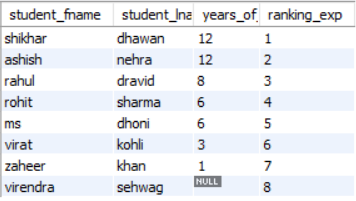

##### 5th highest salary

```sql
SELECT * from (select student_fname,student_lname, years_of_experience, row_number() 
               OVER (order by years_of_experience desc) AS ranking_exp from students)
                temptable where ranking_exp = 5;
```

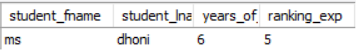

## 2. RANK  and DENSE RANK



- RANK assigns the same rank to tied rows and skips the next rank number. For example, if two rows have the same value and are assigned rank 1, the next row would be assigned rank 3.


- DENSE_RANK, on the other hand, assigns the same rank to tied rows and does not skip any rank numbers. For example, if two rows have the same value and are assigned rank 1, the next row would be assigned rank 2.

__In summary, RANK can have "gaps" in the rank numbers, while DENSE_RANK always assigns consecutive rank numbers.__

### NOTE : For RANK and DENSE RANK ORDER BY is mandatory

#### ROW NUMBER

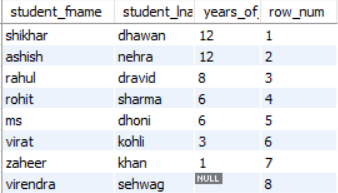

#### RANK

```sql
SELECT *, 
RANK() OVER (ORDER BY years_of_experience DESC) as ranking 
from students;
```

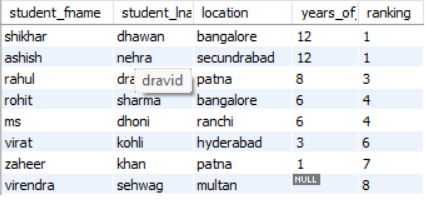

#### rank branch wise

```sql
SELECT *, 
RANK() OVER(PARTITION BY (branch) ORDER BY marks DESC) as rank_student
from  task_campusx.marks;
```

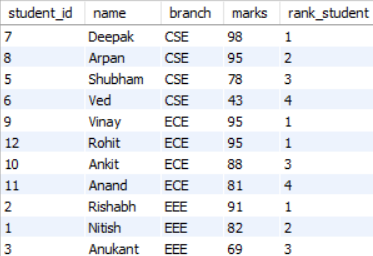

#### DENSE RANK

```sql
SELECT student_fname, student_lname, location, years_of_experience, 
DENSE_RANK() over(ORDER BY years_of_experience DESC) as dense_ranking 
from students;
```

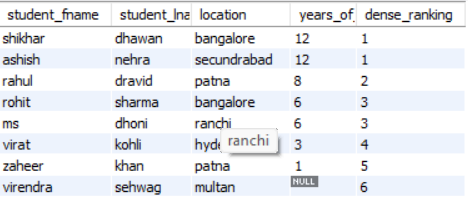

### RANK () vs DENSE_RANK()

```sql
SELECT *, 
RANK() OVER(PARTITION BY (branch) ORDER BY marks DESC) as rank_student,
DENSE_RANK() OVER(PARTITION BY (branch) ORDER BY marks DESC) as dense_rank_student
from  task_campusx.marks;
```

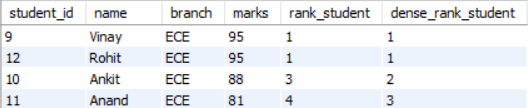

## 3. LEAD and LAG

Return the value of a specified column from a row at a specified offset from the current row, either ahead (LEAD) or behind (LAG) in the result set.

##### LAG : Grouping on source of joining

```sql
select student_id, source_of_joining,years_of_experience,
LAG (years_of_experience) over (partition by source_of_joining order by student_id) as previous_yoe
from students;
```

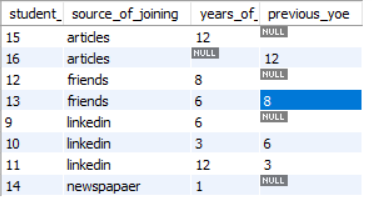

null output is for first record of each group of source_of_joining

##### now passing 2 rows before for each group

```sql
select student_id, source_of_joining,years_of_experience,
LAG (years_of_experience, 2, 0) over (partition by source_of_joining order by student_id) as previous_yoe
from students;
```

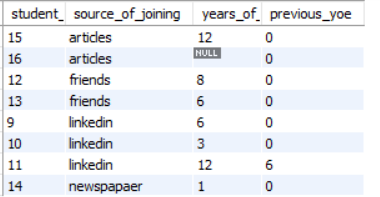

##### LEAD : Grouping on source of joining

```sql
select student_id, source_of_joining,years_of_experience,
LEAD (years_of_experience) over (partition by source_of_joining order by student_id) as previous_yoe
from students;
```

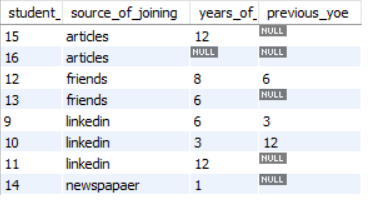

null output is for last record of each group of source_of_joining

##### now passing 2 rows after for each group

```sql
select student_id, source_of_joining,years_of_experience,
LEAD(years_of_experience, 2,0) over (partition by source_of_joining order by student_id) as previous_yoe
from students;
```

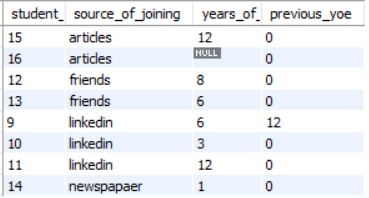

### Month on Month Growth using LAG


```sql
SELECT MONTHNAME(date) as monthname,
SUM(amount) as revenue,
((SUM(amount) - LAG(SUM(amount)) OVER())/LAG(SUM(amount)) OVER())*100 as mom_growth
FROM orders
GROUP BY MONTHNAME(date);
```

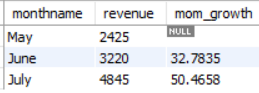

## 4. First_value() - first record of  years for each group

```sql
select student_id, student_fname, location,source_of_joining,years_of_experience, 
first_value(years_of_experience) over (partition by source_of_joining order by years_of_experience desc ) as most_experienced
from students;
```

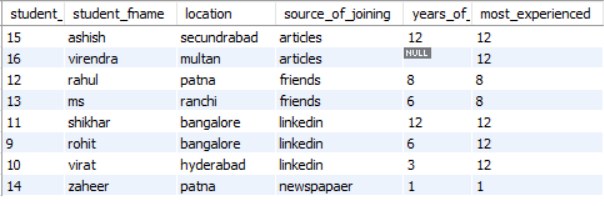

### Student name who has highest marks overall

```sql
SELECT *,
FIRST_VALUE(name) OVER (ORDER BY marks DESC) as highest_marks
from task_campusx.marks;
```

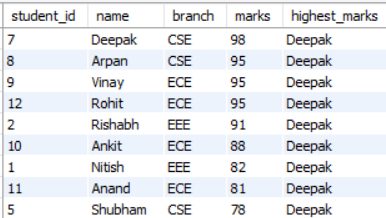

###  name and branch and marks of only toppers

```sql
SELECT name,branch,marks from 
  (SELECT *,
  FIRST_VALUE(name) OVER (PARTITION BY branch ORDER BY marks DESC) as topper,
  FIRST_VALUE(marks) OVER (PARTITION BY branch ORDER BY marks DESC) as marks_topper
  from task_campusx.marks) as 
t
WHERE t.name=t.topper;
```

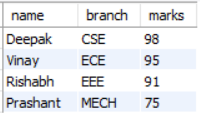

## 5. Last_value() - last years for each group

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
last_value(years_of_experience) over (partition by source_of_joining order by years_of_experience desc) as least_experienced
from students;
```

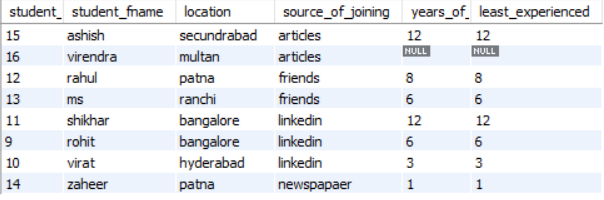

### NOTE : We are not getting correct results bcoz of FRAME () clause

___Default FRAME clause:___

over (partition by source_of_joining order by years_of_experience desc __range between unbounded preceding and current row)__ as least_experienced

##### changing current row to unbounded following for last_value to work:

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
last_value(years_of_experience) 
over (partition by source_of_joining order by years_of_experience desc 
range between unbounded preceding and unbounded following)  as least_experienced
from students;
```

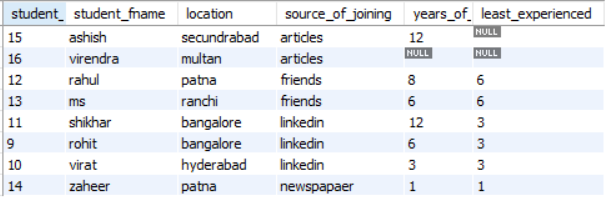

### another example

```sql
SELECT *,
LAST_VALUE(marks) OVER (ORDER BY marks DESC ROWS BETWEEN  UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as highest_marks
from task_campusx.marks;
```

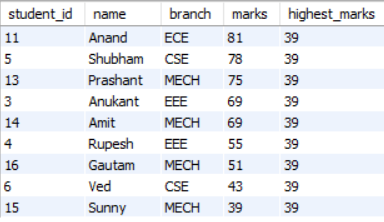

### name and branch of lowest marks

```sql
SELECT name,branch,marks from 
  (SELECT *,
  LAST_VALUE(name) OVER (PARTITION BY branch ORDER BY marks DESC
                          ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as topper,
  LAST_VALUE(marks) OVER (PARTITION BY branch ORDER BY marks DESC
                          ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) as marks_topper
  from task_campusx.marks) as 
table1
WHERE table1.name=table1.topper;
```

#### OR

```sql
SELECT 
name,branch,marks from 
  (SELECT *,
  LAST_VALUE(name) OVER w as topper,
  LAST_VALUE(marks) OVER w as marks_topper
  from task_campusx.marks
  WINDOW w AS (PARTITION BY branch ORDER BY marks DESC ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING)) as 
table1
WHERE table1.name=table1.topper;
```

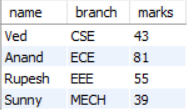

## FRAME clause()


- FRAME is a subset of partition created by Windows function.


- It  defines the scope of the calculation performed by a window function, and it's used to specify which rows should be included in the calculation based on their relative position to the current row performed by a window function.


___The ROWS clause___ specifies how many rows should be included in the frame
relative to the current row. For example, ROWS 3 PRECEDING means that the
frame includes the current row and the three rows that precede it in the partition.


___The BETWEEN___ clause specifies the boundaries of the frame.


The FRAME clause has two components:

- __ROWS BETWEEN :__ Specifies the range of rows to include in the calculation, either UNBOUNDED PRECEDING and UNBOUNDED FOLLOWING, to include all rows, or a range such as 1 PRECEDING and 1 FOLLOWING to include only the current row and its two neighbors.


- __EXCLUSIVE or INCLUSIVE :__ Specifies whether the first and last rows in the frame should be included in the calculation or excluded.

Examples


- __ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW__ - means that the
frame includes all rows from the beginning of the partition up to and including the
current row.


- __ROWS BETWEEN 1 PRECEDING AND 1 FOLLOWING:__ the frame includes the
current row and the row immediately before and after it.


- __ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING:__ the
frame includes all rows in the partition.


- __ROWS BETWEEN 3 PRECEDING AND 2 FOLLOWING:__ the frame includes the
current row and the three rows before it and the two rows after it.

#### Difference between (range between unbounded preceding and current row) AND (rows between unbounded preceding and current row)

- `(range between unbounded preceding and current row)` considers rows based on their values in the ordering column within a specified range of the current row's value.


- `(rows between unbounded preceding and current row)` includes a fixed number of rows, starting from the first row of the partition (unbounded preceding) up to and including the current row.

## 6. Nth_Value

The NTH_VALUE function in MySQL is a window function that returns the nth value __(any value from a position specified by us)__ in a set of values, based on a specified order. The function returns the value of a specified expression for the nth row in the window frame, where the frame is defined using the OVER clause.

##### 2nd most experienced person from each group

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
nth_value(years_of_experience, 2) 
over (partition by source_of_joining order by years_of_experience desc 
range between unbounded preceding and unbounded following)  as 2nd_most_experienced
from students;
```

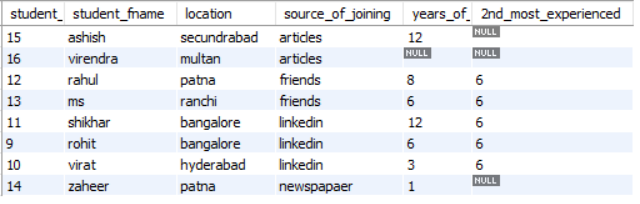

### NOTE : if number of rows in any group is less than tha nth_value provided, that group will return NULL

## 7. Ntile

- Segmentation using NTILE is a technique in SQL for **dividing a dataset into equal-
sized groups** based on some criteria or conditions, 


- and then performing calculations or analysis on each group separately using window functions.It returns a number representing the group or tile that each row belongs to.


The NTILE function in SQL is a window function that returns the ntile value for a __set of rows (buckets)__ based on a specified order. 



```sql
SELECT
  Student,
  Score,
  NTILE(3) OVER (ORDER BY Score) AS TileNumber
FROM
  scores;
```

```
|--------|-------|------------|
| Student| Score | TileNumber |
|--------|-------|------------|
| Frank  | 70    | 1          |
| Helen  | 75    | 1          |
| Carol  | 78    | 1          |
| Alice  | 85    | 2          |
| Jack   | 83    | 2          |
| David  | 88    | 2          |
| Grace  | 89    | 2          |
| Ivan   | 91    | 3          |
| Bob    | 92    | 3          |
| Eve    | 95    | 3          |
+--------+-------+------------+
```

#### example 2:

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
NTILE(2) over (order by years_of_experience desc) as ntile_groups 
from students
where source_of_joining = 'linkedin'
```

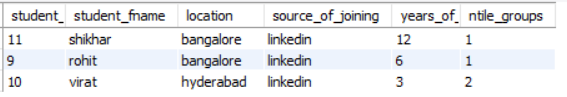

### NOTE : if total rows is uneven when divided, then 1st quantile group gets more records 

### Using cases in Ntile

```sql
select *,
CASE
when x.ntile_groups = 1 then 'Experienced Student'
when x.ntile_groups = 2 then 'Inexperienced Student'
END experience_category
from(
select student_id, student_fname, location,source_of_joining, years_of_experience,
ntile(2) over (order by years_of_experience desc) as ntile_groups from students
where source_of_joining = 'linkedin') x;
```

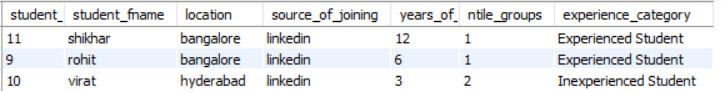

## 8. CUME_DIST() - cummulative distribution

The cumulative distribution function is used to
describe the probability distribution of random
variables. 

It can be used to describe the probability
for a discrete, continuous or mixed variable. It is
obtained by summing up the probability density
function and getting the cumulative probability for
a random variable

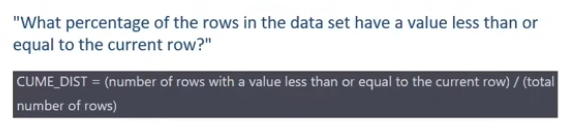

#### students having marks greater than 90 percentile:

```sql
SELECT * FROM 
      (SELECT *,CUME_DIST() OVER(ORDER BY marks) AS 'Percentile_Score'
      FROM marks) 
t
WHERE t.Percentile_Score > 0.90
```

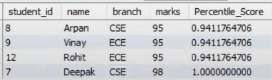

#### Another example:

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
cume_dist() over (partition by source_of_joining order by years_of_experience desc) as cume_distri
from students;
```

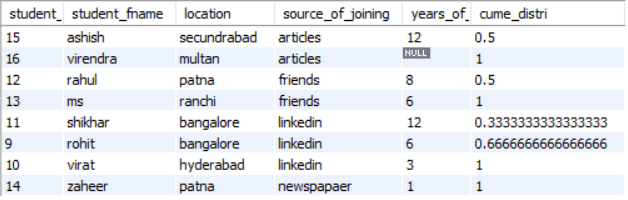

### using it to fetch first 35% from each group

```sql
select *
from (
select student_id, student_fname, location,source_of_joining, years_of_experience,
round(cume_dist() over (partition by source_of_joining order by years_of_experience desc),3) as cume_distri
from students
) x
where x.cume_distri >=0.35;
```

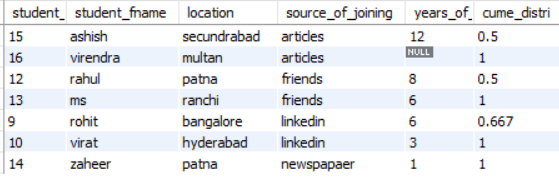

## 9. PERCENT_RANK

percent_rank is a window function in SQL that calculates the __relative rank of a row within a set of rows,__ represented as a decimal value between 0 and 1, where 0 represents the lowest rank and 1 represents the highest rank.

The percent_rank function is used in a similar way to the rank function, but instead of returning the rank as an integer, it returns the rank as a decimal value. The percent_rank function is calculated as: __(rank - 1) / (total number of rows - 1).__

```sql
select student_id, student_fname, location,source_of_joining, years_of_experience,
round(percent_rank() over (partition by source_of_joining order by years_of_experience desc),3) as cume_distri
from students;
```

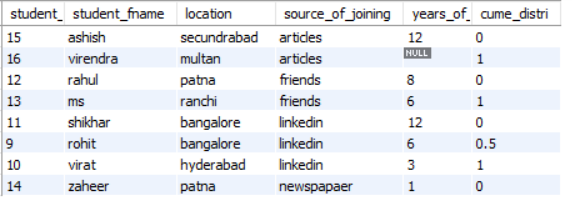

## Difference between cum_dist() and percent_rank()

The difference between percent_rank and cume_dist lies __in the way they calculate the relative position of a row within a set of rows.__

- __percent_rank__ returns the relative rank of a row as a decimal value between 0 and 1, where 0 represents the lowest rank and 1 represents the highest rank. 

__The percent_rank function is calculated as (rank - 1) / (total number of rows - 1).__


- __cume_dist__ returns the cumulative distribution of a value within a set of values, represented as a decimal value between 0 and 1. 

The cume_dist function calculates the fraction of rows that are less than or equal to the current row, within the set of rows defined by the PARTITION BY clause.


```sql
select student_id, student_fname, years_of_experience,
round(percent_rank() over (order by years_of_experience asc)*100,3) as percentage_rank,
round(cume_dist() over (order by years_of_experience asc)*100,3) as cume_distri
from students;
```

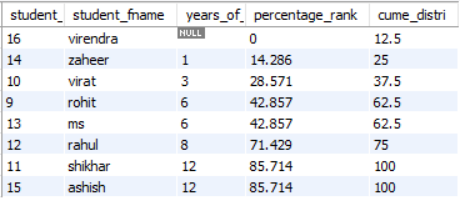

## 10. CUMULATIVE SUM

Cumulative sum is another type of calculation that can be performed using
window functions. A cumulative sum calculates the sum of a set of values up to a
given point in time, and includes all previous values in the calculation.

### career runs of viart kohli after 50th, 100th match

```sql
SELECT * FROM 
    (SELECT 
    CONCAT("Match-",CAST(ROW_NUMBER() OVER(ORDER BY ID) AS CHAR)) AS match_number,
    SUM(batsman_run) as 'runs_scored',
    SUM(SUM(batsman_run)) OVER(ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as career_runs
    from ipl
    WHERE batter = 'V Kohli'
    GROUP BY ID) as t
WHERE match_number IN ('Match-50','Match-100');
```

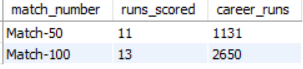

### 11. CUMULATIVE AVERAGE

Cumulative average is another type of average that can be calculated using
window functions. A cumulative average calculates the average of a set of values
up to a given point in time, and includes all previous values in the calculation.

```sql
SELECT * FROM 
    (SELECT 
    CONCAT("Match-",CAST(ROW_NUMBER() OVER(ORDER BY ID) AS CHAR)) AS match_number,
    SUM(batsman_run) as 'runs_scored',
    SUM(SUM(batsman_run)) OVER(ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as career_runs,
    AVG(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as career_average
    from ipl
    WHERE batter = 'V Kohli' 
    GROUP BY ID) as 
t;
```

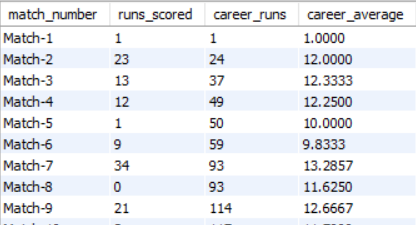

## 12. MOVING AVERAGE/ ROLLING AVERAGE

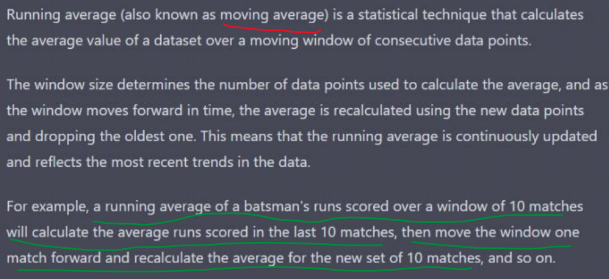

```sql
SELECT * FROM 
    (SELECT 
    CONCAT("Match-",CAST(ROW_NUMBER() OVER(ORDER BY ID) AS CHAR)) AS match_number,
    SUM(batsman_run) as 'runs_scored',
    SUM(SUM(batsman_run)) OVER(ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as career_runs,
    AVG(SUM(batsman_run)) OVER (ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as career_average,
    AVG(SUM(batsman_run)) OVER (ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) as moving_average
    from ipl
    WHERE batter = 'V Kohli'
    GROUP BY ID) as 
t;
```

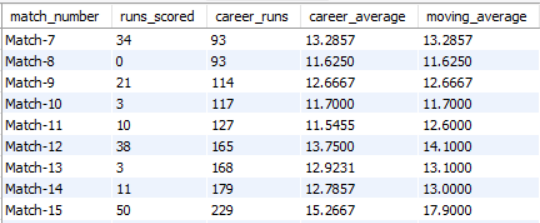

## 13. Percentage of total

Percent of total refers to the percentage or proportion of a specific value in
relation to the total value. It is a commonly used metric to represent the relative
importance or contribution of a particular value within a larger group or
population.

```sql
SELECT
  Product,
  Revenue,
  ROUND((Revenue / SUM(Revenue) OVER ()) * 100, 2) AS Percentage_of_Total
FROM
  sales;
```

Here's the output table:

|   Product |   Revenue |   Percentage_of_Total |
|:---------:|----------:|-----------------------:|
| Product A |    100.00 |                  20.00 |
| Product B |    150.00 |                  30.00 |
| Product A |    200.00 |                  40.00 |
| Product B |    120.00 |                  24.00 |
| Product A |    250.00 |                  50.00 |

In [2]:
l=[100,150,200,120,250]
print(sum(l))

820


### 14. Percentage of change

Percent change is a way of expressing the difference between two
values as a percentage of the original value. It is often used to measure
how much a value has increased or decreased over a given period of
time, or to compare two different values.

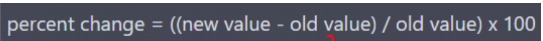

```sql
SELECT 
YEAR(Date),QUARTER(Date), SUM(views) AS 'views',
((SUM(views) - LAG(SUM(views)) OVER (ORDER BY YEAR(Date),QUARTER(Date)))/LAG(SUM(views)) 
OVER(ORDER BY YEAR(Date),QUARTER(Date)))*100 AS 'Percent_change'
FROM youtube_views
GROUP BY YEAR(Date),QUARTER(Date)
ORDER BY YEAR(Date),QUARTER(Date);
```

## 15 . Percentiles & Quantiles

A __Quantile__ is a measure of the distribution of a dataset that divides the data into
any number of equally sized intervals. 


For example, a dataset could be divided into

- __deciles__ (ten equal parts), 


- __quartiles__ (four equal parts), 


- __percentiles__ (100 equal parts), or any other number of intervals.


Each quantile represents a value below which a certain percentage of the data
falls. For example, the 25th percentile (also known as the first quartile, or Q1)
represents the value below which 25% of the data falls. The 50th percentile (also
known as the median) represents the value below which 50% of the data falls, and
so on.

### 16. PERCENTILE_CONT

**PERCENTILE_CONT** calculates the continuous percentile value, which returns the
interpolated value between adjacent data points. In other words, it estimates the
percentile value by assuming that the values between data points are distributed
uniformly. This function returns a value that may not be present in the original
dataset.


**PERCENTILE_DISC**, on the other hand, calculates the discrete percentile value,
which returns the value of the nearest data point. This function returns a value
that is present in the original dataset.

___

## EXISTS / NOT EXISTS

#### used in correlated nested query

```sql
SELECT column_name(s)
FROM table_name
WHERE EXISTS
(SELECT column_name FROM table_name WHERE condition);
```

- The EXISTS operator is used to test for the existence of any record in a subquery.


- The EXISTS operator returns TRUE if the subquery returns one or more records


- __Each row of Outer query table will be compared with rows of inner query table. Entire inner query will run for each row of outer query.__

```sql
SELECT *
FROM users
WHERE EXISTS (
  SELECT *
  FROM orders
  WHERE orders.user_id = users.user_id
);
```

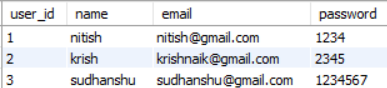

In this example, we're using EXISTS in a subquery to check if there are any rows in the orders table that have a customer_id equal to the id of a row in the customers table. 


If the subquery returns any rows, the EXISTS condition is considered to be true, and the outer query will return all rows from the customers table. 

If the subquery doesn't return any rows, the EXISTS condition is considered to be false, and the outer query won't return any rows.

## ANY and ALL

```sql
SELECT column_name(s)
FROM table_name
WHERE column_name operator ANY
  (SELECT column_name
  FROM table_name
  WHERE condition);
```

__The ANY operator :__

- returns a boolean value as a result


- returns TRUE if ANY of the subquery values meet the condition


- ANY means that the condition will be true if the operation is true for any of the values in the range.

#### Products:
| product_id | product_name | product_price | category_id |
|------------|--------------|---------------|-------------|
| 1          | Laptop       | 1000          | 1           |
| 2          | Smartphone   | 500           | 1           |
| 3          | Tablet       | 300           | 1           |
| 4          | TV           | 800           | 2           |
| 5          | Headphones   | 50            | 3           |


#### Orders:

| order_id | customer_id | product_id |
|----------|-------------|------------|
| 101      | 201         | 1          |
| 102      | 202         | 3          |
| 103      | 203         | 2          |
| 104      | 201         | 4          |
| 105      | 203         | 5          |


- Find products that have been ordered by at least one customer
```sql
SELECT product_name
FROM Products
WHERE product_id = ANY (
    SELECT product_id
    FROM Orders);
```

#### output:

| product_name |
|--------------|
| Laptop       |
| Smartphone   |
| Tablet       |
| TV           |
| Headphones   |


#### eg 2 : ANY


```sql
SELECT product_name FROM Products
WHERE product_price > ANY (SELECT product_price FROM Products WHERE category_id = 4);
```


### The ALL operator:

```sql
SELECT column_name(s)
FROM table_name
WHERE column_name operator ALL
  (SELECT column_name
  FROM table_name
  WHERE condition);
```

- returns a boolean value as a result


- returns TRUE if ALL of the subquery values meet the condition


- is used with SELECT, WHERE and HAVING statements


- ALL means that the condition will be true only if the operation is true for all values in the range.

- Find customers who have ordered all products from category 1 :
```sql
SELECT c.customer_id, c.customer_name
FROM Customers c
WHERE c.customer_id = ALL (
    SELECT o.customer_id
    FROM Orders o
    JOIN Products p ON o.product_id = p.product_id
    WHERE p.category_id = 1
);
```

### EXIST vs ANY

#####  "EXISTS" is used to check the existence of rows in a subquery, whereas "ANY" is used to compare a value with a set of values returned by a subquery. 

#### "EXISTS":
- "EXISTS" is used to check whether a subquery returns any rows. It returns a Boolean value (true or false) based on whether any rows are returned by the subquery.

- It is often used in correlated subqueries, where the subquery refers to a table in the outer query.



#### "ANY"

- ANY" is used to compare a single value to a set of values returned by a subquery. 



- It is used in conjunction with comparison operators such as "=", "<", ">", etc., to compare the value to each value in the result set of the subquery.
The syntax involves using a comparison operator followed by "ANY" and a subquery enclosed in parentheses.

```sql
SELECT *
FROM products
WHERE price > ANY (
    SELECT price
    FROM products
    WHERE category = 'Electronics'
);


```

# WITH clause() / Common Table Expression (CTE) / Sub-query factoring

https://www.youtube.com/watch?v=QNfnuK-1YYY&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=8

The WITH () clause in MySQL is also known as a __Common Table Expression (CTE)__ and is used to simplify complex SQL queries by creating a temporary, named result set that can be referred to within the main query.

A CTE is essentially a named subquery that can be used within a SELECT, INSERT, UPDATE, or DELETE statement.

Here's a breakdown of the syntax:

1. `WITH`: This keyword signals the start of the `WITH` clause.


2. `cte_name`: This is the name you assign to the Common Table Expression. You'll use this name to reference the CTE in the main query.


3. `(column1, column2, ...)`: Optionally, you can specify the column names for the CTE. This is especially useful if you want to give explicit names to the columns in the CTE, which can make the main query more readable.


4. `AS`: This keyword separates the CTE name and column specification from the actual subquery.


5. Subquery: This is where you define the query that generates the temporary result set. This subquery can be a `SELECT` statement that retrieves data from one or more tables and can involve joins, filters, and other operations.


6. Main query: After defining the CTE, you can use it within the main query. The main query can reference the CTE as if it were a table or a subquery, making the code more organized and understandable.


__we start with WITH clause and then give an alias such cte, then pass the column name required__

```sql
WITH cte AS (
  SELECT column1, column2, SUM(column3) AS total
  FROM table_name
  GROUP BY column1, column2
)
SELECT *
FROM cte
WHERE total > 100;
```

### Q- Fetch employees who earn more than average salary of all employees:

> average_salary is a alias of (select avg(salary) from emp_data) which is here a temp table

```sql
with average_salary(avg_sal) as
    (select avg(salary) from emp_data)

select *
from emp_data as e, average_salary
where e.salary > average_salary.avg_sal; 
```

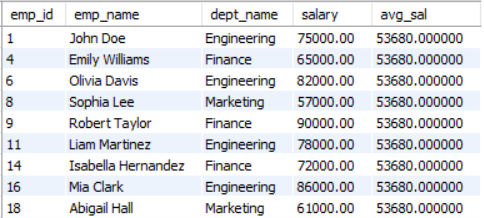

### Q- Apple Stores with sales greater than average sale of combined stores :

__Steps :__

1) Total Sales per store  $\longrightarrow$ Total_sales


2) Find the average sales of all stores together. $\longrightarrow$ Avg_sales



3) find the stores where Total_sales > avg_sales of all stores 

##### - without using WITH clause(), using subqueries

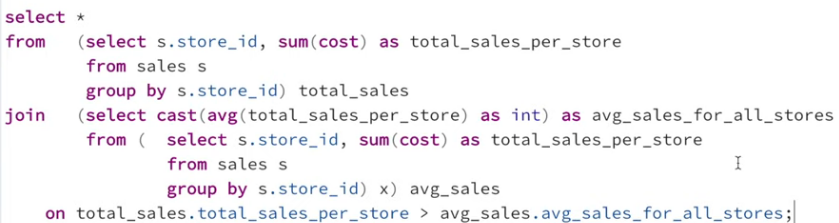

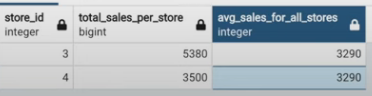

##### - using WITH clause()

- using with clause() we will get the average salary then we give that as a condition to filter data


- first with clause will be Total_Sales


- Second with clause is Avearge_sales

```sql
with Total_sales(store_id, store_name,total_sales_each_store) AS
                (select s.store_id,s.store_name,sum(s.quantity * s.cost) as total_sales_each_store
                from iphone as  s
                group by s.store_id,store_name),                
      Avg_sales(avg_overall) AS (select ROUND(avg(total_sales_each_store),2) as avg_overall from Total_sales)
      

select * from
Total_sales as ts
join Avg_sales as av
on ts.total_sales_each_store > av.avg_overall;
```

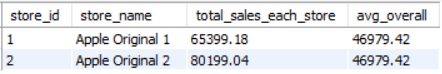

#### Question
Ketty gives Eve a task to generate a report containing three columns: Name, Grade and Mark. Ketty doesn't want the NAMES of those students who received a grade lower than 8. The report must be in descending order by grade -- i.e. higher grades are entered first. 


If there is more than one student with the same grade (8-10) assigned to them, order those particular students by their name alphabetically. 


Finally, if the grade is lower than 8, use "NULL" as their name and list them by their grades in descending order. 


If there is more than one student with the same grade (1-7) assigned to them, order those particular students by their marks in ascending order.


```sql
with cte as (select * from (SELECT name,marks,
CASE
    WHEN marks between 90 AND 100 THEN 10
    WHEN marks between 80 AND 89 THEN 9
    WHEN marks between 70 AND 79 THEN 8
end as grades
from students
WHERE marks>=70) as t1
             
UNION ALL
             
select * from 
    (SELECT name,marks,
    CASE
        WHEN marks between 60 AND 69 THEN 7
        WHEN marks between 50 AND 59 THEN 6
        WHEN marks between 40 AND 49 THEN 5
        WHEN marks between 30 AND 39 THEN 4
        WHEN marks between 20 AND 29 THEN 3
        WHEN marks between 10 AND 19 THEN 2
        WHEN marks between 1 AND 9 THEN 1
    END as grades
    from students
    WHERE marks<70) as  
t2
ORDER BY grades DESC, name ASC, marks ASC )


select 
CASE
    WHEN grades > 7 then name
    ELSE "NULL"
END as names, 
grades,marks
from cte;
```

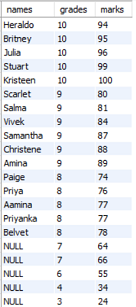

### Using 2 cte's together

```sql
with cte as 
    (select c.hacker_id,h.name,
    COUNT(*) as c_created
    from challenges2 as c
    JOIN hackers2 as h
    ON c.hacker_id = h.hacker_id
    GROUP BY c.hacker_id,h.name),

cte2 as 
    (select *,
    COUNT(*) over(PARTITION BY cte.c_created) as total_count
    from cte
    ORDER BY c_created DESC)

select 
    cte2.hacker_id, 
    cte2.name, 
    cte2.c_created 
    from cte2
    WHERE (cte2.c_created = (select MAX(cte2.c_created) from cte2)) 
           OR cte2.total_count = 1
    ORDER BY c_created DESC,hacker_id;
```

### Benefits of using CTE (WITH clause) :

- __Improved readability:__ A CTE can make a complex query easier to understand by breaking it down into smaller, named sub-queries that can be referenced within the main query.


- __Reusability:__ A CTE can be used multiple times within a single query or across multiple queries, which can improve code reuse and make maintenance easier.


- __Improved performance :__ A CTE can be used to break down a complex query into smaller, more manageable parts, which can improve query performance by reducing the amount of data that needs to be processed at each stage.


- __Improved maintainability:__ By encapsulating a sub-query within a CTE, the query becomes self-contained, making it easier to understand and maintain, especially for complex queries.


- __Better error handling :__ If a query that includes a CTE encounters an error, only the CTE is affected, rather than the entire query, which can simplify debugging and error handling.


- __Improved optimization:__ By breaking down a complex query into smaller sub-queries, the optimizer can better evaluate the cost of each part, leading to more efficient query execution.

In summary, the use of the WITH clause provides several benefits that can lead to improved performance, readability, and maintainability of SQL queries.

___
___

# Indexes

good video : https://www.youtube.com/watch?v=fsG1XaZEa78

- Index is a database object that makes data retrival faster.


- it is created on columns that are frequnetly used. These are created on specific columns of a table and store a copy of the data in those columns in a separate data structure. This allows the DBMS to rapidly locate data without having to scan the entire table.



- Indexes work similarly to the index of a book, helping the database locate the desired data more efficiently. Without indexes, the DBMS would need to scan the entire table, which can become inefficient for large datasets.
 

- __Index for primary and unique constraints are automatically created and dropped during table creation and deletion.__


- Index improves performance in select but hamper insert update delete. so not good idea to create index on every column.


- Index contains redundant data already existing in table. hence consumes space.


- Each table can have only one clustered index usually created on a primary key


- No limit on non clustered index

__Index Key :__ Column on which we create Index 

## Types of indexes:

### __1. Clustered Index__

- clustered index is a special type of index that physically reorders the rows of a table to match the order of the index.  This means that the data in the table is stored in the same order as the clustered index. 



- As a result, a clustered index is often used as the primary key of a table, as it can provide fast access to rows based on the primary key value. __In a table there can only be 1 clustered index.__ They are physically ordered in the actual table.


- Clustered Index can be made of only 1 column (Primary Key) or using multiple column (composite key) known as composite cluster key.

### 2. Non-clustered Index

- __Not a primary key column__


- A non-clustered index is a type of index that does not physically reorder the rows of a table. Instead, it creates a separate structure that maps the values of one or more columns in the table to their physical location. 


- When a query is executed that uses a non-clustered index, the database must first look up the index to find the physical location of the data, and then retrieve the actual data from the table.


-  A table can have multiple non clustered index

## Difference between Clustered and Non-clustered Indexes

- The main difference between clustered and non-clustered indexes is that a clustered index physically reorders the rows of a table to match the index, while a non-clustered index provides a mapping of values to physical locations but does not change the physical order of the table.


-  A table can have multiple non-clustered index but it can only have 1 clustered index

## SEEK and SCAN in sql

https://www.youtube.com/watch?v=gZu2ZldwrK4

"Seek" and "Scan" are two methods used by the MySQL database management system to __search for data in a table.__

- __Seek__ is a direct lookup method, where MySQL **uses the index of a table** to quickly find a specific row of data based on its unique key. This method is fast and efficient, but it can only be used when searching for an exact match of a unique key value.


- __Scan__ on the other hand, is a method where MySQL scans the entire table to find the rows that match a certain condition. This method is slower than "Seek", but it can be used to find all rows that match a certain condition, even if no index exists for the columns being searched. Scans can also be used to return all rows in a table if no specific search condition is provided.


__In summary, "Seek" is a fast, direct lookup method for finding a specific row in a table, while "Scan" is a slower method for finding all rows that match a certain condition.__

### CREATE INDEX

The CREATE INDEX statement is used to create indexes in tables.

Indexes are used to retrieve data from the database more quickly than otherwise. The users cannot see the indexes, they are just used to speed up searches/queries.

```sql
CREATE INDEX index_name
ON table_name (column_name);
```

### Note: Updating a table with indexes takes more time than updating a table without (because the indexes also need an update). So, only create indexes on columns that will be frequently searched against.

#### CREATE UNIQUE INDEXES

```sql
CREATE UNIQUE INDEX index_name
ON table_name (column_name);
```

#### COMPOSITE INDEX

```sql
CREATE INDEX index_name
ON table_name(column1,column2)
```

#### DROP INDEX :

```sql
ALTER TABLE table_name
DROP INDEX index_name;
```

#### VIEW index of a particular  table

```sql
SELECT * from user_indexes where table_name = 'table-name';
```

### Types of scans in sql:

Important types of scans in SQL, explained briefly:

1. **Table Scan**:
   - Reads the entire table, row by row.
   
   - Used when there's no suitable index or for queries requiring all table data.
   


2. **Index Scan**: 
      
      - Scans an index structure to locate rows that match a condition.
       
      - Can be slow for large data ranges or if many rows match the condition.



3. **Clustered Index Scan**:
   
   - Scans the entire table based on the order of the clustered index.
   
   - Used when the query can't utilize an index seek on the clustered index.



4. **Index Seek**:
   
   - Directly finds specific rows using an index. 
   
   - Efficient for targeted searches and equality conditions.



5. **Covering Index Scan**:
   - Uses a specialized index that includes all columns needed for a query.
   
   - Reduces the need to access the actual table, improving performance.

These are the key scan types to be aware of in SQL. The choice of scan type depends on the query, indexing, and the specific data retrieval needs.

### B-Tree index

- B-Tree index is like an organized, multi-level list of values in a database, making it quick to find specific data. 


- It's structured hierarchically, with branching nodes and leaves, helping databases efficiently search and retrieve information, especially in large datasets.


- B-tree is a self-balancing tree structure where each node can have multiple child nodes. The name "B-tree" stands for "balanced tree," and the structure maintains balance by redistributing data between nodes as data is inserted or deleted.




**Characteristics of B-Tree Index:**

1. **Sorted Order:** B-trees maintain data in a sorted order based on the indexed columns. This enables efficient range-based queries and ordered retrieval.


2. **Balanced Structure:** B-trees are self-balancing, ensuring that the height of the tree remains relatively small. This ensures efficient search operations.


3. **Multiple Levels:** B-trees can have multiple levels of nodes, and each level corresponds to a level of precision in the sorting order.


4. **Branching Factor:** Each node in a B-tree can have multiple children, known as the "branching factor." This factor keeps the number of nodes at each level manageable.


5. **Root and Leaf Nodes:** B-trees have a root node at the top, which branches into intermediate nodes, and ultimately into leaf nodes where actual data resides.


6. **Efficient Insertion and Deletion:** B-trees maintain their balance and structure during insertion and deletion operations, optimizing performance.

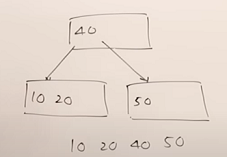

**How B-Tree Indexes Are Utilized:**

When you create a B-tree index on a column or set of columns in a table, the DBMS creates a separate data structure that organizes the indexed data in a B-tree format. This index structure is then used by the DBMS to quickly locate the rows that satisfy query conditions involving the indexed columns.

B-tree indexes are particularly effective for scenarios where you need to perform range-based searches, such as finding records within a specific date range, or retrieving data in ascending or descending order based on indexed columns.

Example of Creating a B-Tree Index:

```sql
CREATE INDEX idx_sales_date ON sales(sales_date);
```

In this example, an index named "idx_sales_date" is created on the "sales_date" column of the "sales" table. This B-tree index would improve the efficiency of queries involving date-based range searches.

B-tree indexes are a fundamental tool in database optimization, helping to significantly enhance the performance of various types of queries.

---